In [1]:
# Import pandas
import pandas as pd

In [2]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

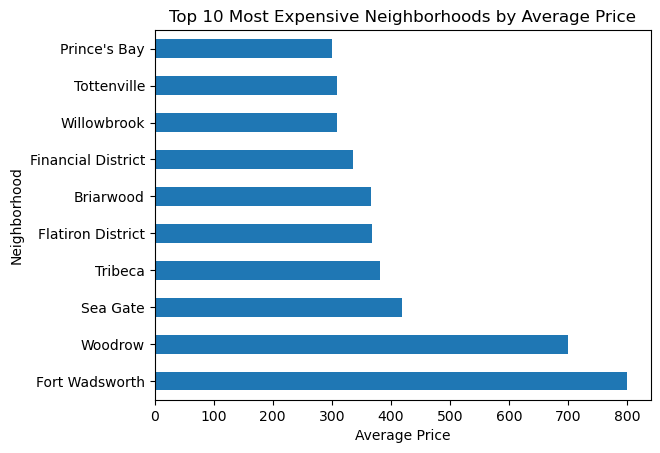

          neighbourhood       price
82       Fort Wadsworth  800.000000
220             Woodrow  700.000000
175            Sea Gate  418.230769
198             Tribeca  381.107143
75    Flatiron District  367.415584
22            Briarwood  366.162162
73   Financial District  335.385057
216         Willowbrook  309.000000
196         Tottenville  309.000000
158        Prince's Bay  300.000000


In [3]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.
#print(df.head())

import pandas as pd
import matplotlib.pyplot as plt

# Group by neighborhood and calculate the average price
df_prices = df.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by price in descending order and take the top 10
df_sorted = df_prices.sort_values(by='price', ascending=False).head(10)


df_sorted.plot.barh(x='neighbourhood', y='price', legend=False)


plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Most Expensive Neighborhoods by Average Price')

plt.show()

print(df_sorted)


In [4]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price
# Display the top 10 DataFrame as a table with columns 'neighbourhood' and 'price'
df_sorted = df_prices.sort_values(by='price', ascending=False).head(10)

# Reset the index for better formatting
df_sorted = df_sorted.reset_index(drop=True)

# Display the table
print(df_sorted)


        neighbourhood       price
0      Fort Wadsworth  800.000000
1             Woodrow  700.000000
2            Sea Gate  418.230769
3             Tribeca  381.107143
4   Flatiron District  367.415584
5           Briarwood  366.162162
6  Financial District  335.385057
7         Willowbrook  309.000000
8         Tottenville  309.000000
9        Prince's Bay  300.000000


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

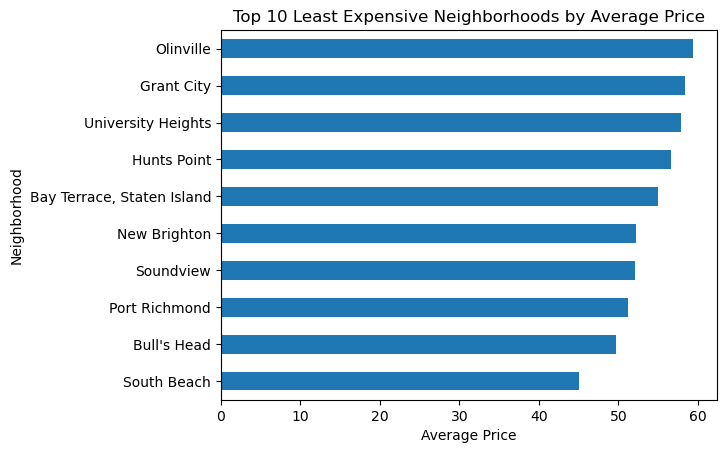

                neighbourhood      price
0                 South Beach  45.000000
1                 Bull's Head  49.666667
2               Port Richmond  51.222222
3                   Soundview  52.055556
4                New Brighton  52.250000
5  Bay Terrace, Staten Island  55.000000
6                 Hunts Point  56.583333
7          University Heights  57.826087
8                  Grant City  58.400000
9                   Olinville  59.428571


In [5]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
# Group by neighborhood and calculate the average price
df_prices = df.groupby('neighbourhood')['price'].mean()

# Sort by price in ascending order and take the bottom 10
df_sorted_least = df_prices.sort_values(ascending=True).head(10)

# Plot the bar chart using the bottom 10 neighborhoods
df_sorted_least.plot.barh()

# Additional labels and title
import matplotlib.pyplot as plt
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Least Expensive Neighborhoods by Average Price')

# Show the plot
plt.show()

# Display the data as a DataFrame
df_sorted_least = df_sorted_least.reset_index()  # Optional if you want to display this as a DataFrame
print(df_sorted_least)


In [7]:
# we also would like to have the corresponding pivot table of the lowest 10
# Create a pivot table for the bottom 10 neighborhoods by average price
pivot_table_least = pd.pivot_table(df, values='price', index='neighbourhood', aggfunc='mean')

# Sort the pivot table by price and select the bottom 10 neighborhoods
pivot_table_least_sorted = pivot_table_least.sort_values(by='price').head(10)


print(pivot_table_least_sorted)

# Save the DataFrame to a CSV file for Tableau
df_sorted.to_csv('top_10_expensive_neighborhoods.csv', index=False)


# Assuming your original DataFrame 'df' is already loaded
# Group by neighborhood and calculate the average price
df_prices = df.groupby('neighbourhood')['price'].mean().reset_index()

# Get the top 10 most expensive neighborhoods
df_most_expensive = df_prices.sort_values(by='price', ascending=False).head(10)
df_most_expensive['Category'] = 'Most Expensive'

# Get the top 10 least expensive neighborhoods
df_least_expensive = df_prices.sort_values(by='price', ascending=True).head(10)
df_least_expensive['Category'] = 'Least Expensive'

# Combine both into a single DataFrame
df_combined = pd.concat([df_most_expensive, df_least_expensive])

# Save the combined DataFrame to a CSV file
df_combined.to_csv('most_and_least_expensive_neighborhoods.csv', index=False)

# Display the combined DataFrame (optional)
print(df_combined)

                                price
neighbourhood                        
South Beach                 45.000000
Bull's Head                 49.666667
Port Richmond               51.222222
Soundview                   52.055556
New Brighton                52.250000
Bay Terrace, Staten Island  55.000000
Hunts Point                 56.583333
University Heights          57.826087
Grant City                  58.400000
Olinville                   59.428571
                  neighbourhood       price         Category
82               Fort Wadsworth  800.000000   Most Expensive
220                     Woodrow  700.000000   Most Expensive
175                    Sea Gate  418.230769   Most Expensive
198                     Tribeca  381.107143   Most Expensive
75            Flatiron District  367.415584   Most Expensive
22                    Briarwood  366.162162   Most Expensive
73           Financial District  335.385057   Most Expensive
216                 Willowbrook  309.000000   Most Expen

#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!